06_Terwolde
The long_name of the variable is: Maximum 002: water level, maximum depth value


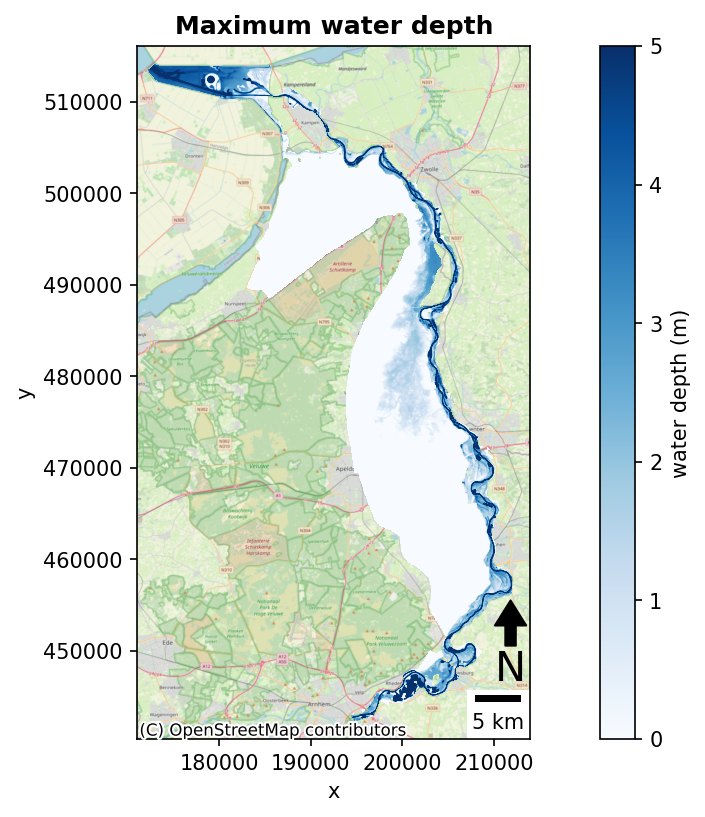

In [1]:
# -*- coding: utf-8 -*-
"""
The fou.nc file is read and *variable* is extracted. Next, the mesh data is 
converted to a raster and saved to a .tiff.
Created on Fri December 1th 2023

@author: Hydrologic
"""

import os, sys
import netCDF4 as nc
import numpy as np
sys.path.append("..")
from model.dataloader.dataloader_flowmesh import mesh_to_tiff
from model.helper_functions.plotting import raster_plot_with_context

# Initialize base directory
inputdir = '...'
outputdir = '...'

# Obtain all scenario's as specified in the folder
cases = [item for item in os.listdir(inputdir) if os.path.isdir(os.path.join(inputdir, item))]

# Raster options
resolution = 20  # m
distance_tol = 36  # m
interpolation = r"nearest"

for case in cases:
    print(case)

    # Generate output directory
    if not os.path.exists(os.path.join(outputdir, case)):
        os.makedirs(os.path.join(outputdir, case))

    # Load mesh coordinates and data from netCDF 
    data_fou = nc.Dataset(inputdir + '/%s/DFM_fou.nc' % case)
    # Load fourier data on maximum depth
    node_data = np.asarray(data_fou.variables['Mesh2d_fourier002_max_depth'][:]).flatten()

    print('The long_name of the variable is: ' + data_fou.variables['Mesh2d_fourier002_max_depth'].long_name)

    # convert to raster and save as tiff
    _, _, grid_data = mesh_to_tiff(
        node_data,
        inputdir + '/%s/DFM_fou.nc' % case,
        os.path.join(outputdir, case) + '/depth-maximum.tiff',
        resolution,
        distance_tol,
        interpolation=interpolation,
    )

    # Plotting max water depth
    colorlist = ["#ffffff", "#9fd7ed", "#86c2eb", "#6db1e8", "#539fe6", "#348ce3", "#2176d9", "#215fcc",
                "#204cbd", "#1c36ad", "#1521a1", "#090991"]
    labellist = ["<0.05m",'0.05-0.25m', '0.25-0.50m', '0.50-0.75m','0.75-1.00m', '1.00-1.50m',
                '1.50-2.00 m','2.00-2.50 m', '2.50-3.00m','3.00-4.00m', '4.00-5.00m','> 5.00m']
    
    # When working with class maps, specify the bounds using the integer index of the different water depth classes, 1-based. 
    boundlist = [0.01, 0.05, 0.25, 0.50, 0.75, 1.00, 1.50, 2.00, 2.50, 3.00, 4.00, 5.00]
    fig, ax = raster_plot_with_context(
        raster_path = os.path.join(outputdir, case) + '/depth-maximum.tiff', 
        epsg = 28992,
        vmax=5, 
        #custom_legend = True,
        #custom_colors = colorlist,
        #custom_labels = labellist,
        #custom_bounds = boundlist,
        transparent_below_vmin = True,
        clabel = "water depth (m)", 
        cmap = "Blues",
        title = "Maximum water depth",
        cmap_extend = 'max'
    )